/mnt/d/coding/git/TomaszKaleczyc/star_wars_image_generator/environment/___venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Diffusion parameters:
	* Timesteps: 200
	* Starting beta: 0.0001
	* Final beta: 0.0200
STAR WARS Image dataset
Loaded 4183 images


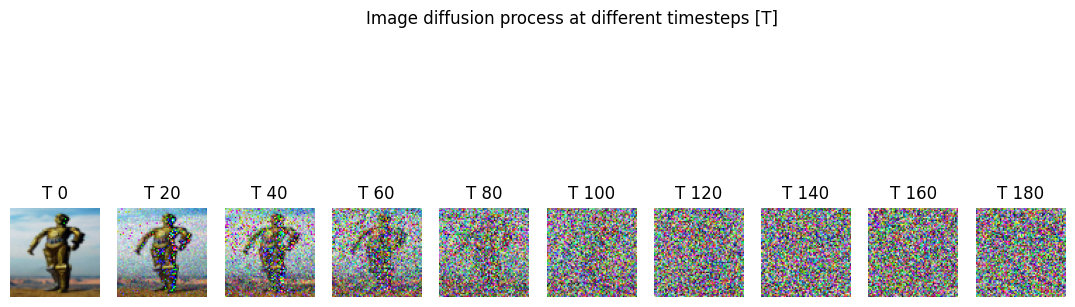

In [1]:
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt

from dataset import DiffusionSampler, SWImageDataset
from utils import image_utils


dsampler = DiffusionSampler()
dset = SWImageDataset()

tensor = dset.__getitem__(666)

plt.figure(figsize=(15, 5))
plt.suptitle('Image diffusion process at different timesteps [T]')
num_images = 10
stepsize = int(dsampler.timesteps / num_images)

for idx in range(0, dsampler.timesteps, stepsize):
    ax = plt.subplot(1, num_images + 1, (idx // stepsize) + 1)
    image, noise = dsampler.forward_sample(tensor, idx)
    image_utils.show_tensor_image(image)
    ax.title.set_text(f'T {idx}')
    ax.axis('off')